# CM3060 Natural Language Processing - Mid-term
This report investigates the problem of fake news detection through a comparative study of traditional statistical methods and modern embedding-based deep learning models. By systematically evaluating their performance, efficiency, and practical trade-offs on a real-world dataset, this coursework aims to provide empirical insights into the strengths and limitations of each approach within the broader field of Natural Language Processing

### 1. Domain-specific area

The proliferation of digital media has democratized information dissemination, enabling news to spread instantaneously across the globe. However, this unrestricted flow of information has also introduced a significant challenge: the rapid propagation of fake news, defined as intentionally deceptive or misleading information presented in the form of legitimate news. Automated fake news detection has therefore emerged as a critical research area within Natural Language Processing (NLP), given its profound implications for societal stability and democratic processes.

The significance of this domain is well documented in the literature. Vosoughi et al. demonstrated that false information spreads significantly faster, farther, and more broadly than truthful news across online platforms, amplifying its potential harm. The consequences of such diffusion include political manipulation, erosion of public trust in institutions, and the dissemination of dangerous medical misinformation during global health crises. These findings highlight the urgent need for effective mitigation strategies.

Traditionally, misinformation has been addressed through manual fact-checking by professional journalists and domain experts. While effective on a small scale, this approach is fundamentally unscalable due to the volume, velocity, and real-time nature of user-generated content on platforms such as Twitter (now X) and Facebook. As a result, there is growing demand for automated systems capable of detecting fake news accurately and efficiently at scale.

From a computational linguistics perspective, fake news detection is typically formulated as a binary text classification task. The challenge lies in distinguishing deceptive content from legitimate journalism based solely on linguistic cues, such as emotionally charged language, hyper-partisan framing, and stylistic irregularities, without relying on external metadata or social network features. Early approaches in this domain primarily employed statistical models using handcrafted features such as n-grams and term-frequency representations. While these methods are computationally efficient and interpretable, they often struggle to capture deeper semantic relationships within text.

More recent research suggests that embedding-based and deep learning approaches can outperform traditional statistical classifiers by modelling contextual and semantic dependencies more effectively. Shu et al. argue that word embeddings enable models to capture latent linguistic patterns that are not easily represented through surface-level frequency features alone. However, despite these advances, there remains limited empirical analysis that directly compares traditional statistical models and embedding-based classifiers under identical preprocessing pipelines, datasets, and evaluation metrics.

This coursework addresses this gap by focusing specifically on fake news detection at the level of full-length news articles sourced from online media outlets. By systematically comparing a statistical classification approach with an embedding-based model within a controlled experimental setting, this project aims to evaluate the relative strengths and limitations of each paradigm. In doing so, it contributes to a clearer understanding of how different NLP methodologies perform in a high-impact, real-world text classification domain.

### 2. Objectives

The primary objective of this project is to conduct a rigorous comparative analysis of two distinct paradigms in Natural Language Processing traditional statistical modeling and modern embedding-based deep learning to evaluate their efficacy in the automated detection of fake news.

Specifically, this coursework aims to contrast the performance of a **Multinomial Naive Bayes classifier**, utilizing TF-IDF (Term Frequency-Inverse Document Frequency) vectorization, against a **Long Short-Term Memory (LSTM) neural network**, utilizing dense word embeddings (e.g., Keras Embeddings or GloVe). This comparison is designed to test the hypothesis that while statistical models offer computational efficiency and interpretability, embedding-based models are superior in capturing the semantic dependencies and contextual nuances often employed in deceptive news articles.

Key methodological objectives include:

1. **Feature Representation Analysis:** To examine how different text representations affect classification performance. I aim to determine if the "Bag-of-Words" approach (ignoring word order) is sufficient for this domain, or if preserving sequential context via embeddings is necessary to distinguish subtle disinformation.
2. **Metric-Driven Evaluation:** To go beyond simple accuracy and prioritize the **F1-score**. In the domain of fake news, the cost of False Negatives (allowing fake news to spread) is high. Therefore, balancing Precision and Recall is a critical objective of the model optimization process.

**Contributions:**
The anticipated contribution of this study extends beyond achieving high classification accuracy. By documenting the trade-offs between training time, model complexity, and predictive performance, this project seeks to provide empirical guidance for deploying fake news detection systems in real-world scenarios. For instance, the results will help determine whether the marginal performance gain of a deep learning model justifies its high computational cost, or if a lightweight statistical model is sufficient for resource-constrained environments (such as mobile devices or real-time stream processing). This analysis contributes to the broader discussion on the efficiency-accuracy trade-off in applied NLP. A practical use case of this work is the deployment of automated fake news detection systems in resource-constrained or real-time environments.

### **3. Dataset Description**

For this comparative study, I have selected the **"Fake and Real News Dataset,"** available on the Kaggle repository and originally compiled by Clément Bisaillon. This dataset is widely recognized in the NLP community for its volume and clean structure, making it an appropriate benchmark for distinguishing statistical and neural classification approaches.

**Origin and Composition**
The dataset comprises approximately **45,000 news articles** collected from 2016 to 2017, a period characterized by heightened political volatility and information warfare. It consists of two distinct CSV files:

- **True.csv (21,417 articles):** Contains legitimate news articles scraped primarily from Reuters.
- **Fake.csv (23,481 articles):** Contains fabricated news articles collected from various flagged sources identified by PolitiFact.

**Data Types and Structure**
The raw data is structured in a tabular format with four primary columns: `title` (String), `text` (String), `subject` (String), and `date` (String).
For the purpose of this project, the input feature vector will be constructed by concatenating the `title` and `text` columns. This is a crucial design choice, as the sensationalist nature of fake news is often most concentrated in the headline, while the body text provides the semantic context necessary for the LSTM model.

**Class Balance and Suitability**
A significant advantage of this dataset is its near-perfect **class balance** (approximately 48% Real vs. 52% Fake). Unlike many real-world fraud detection scenarios which suffer from severe class imbalance, this balanced distribution allows for the use of standard accuracy metrics without the risk of the "Accuracy Paradox," where a trivial model predicting the majority class achieves high performance.

**Critical Data Cleaning: Mitigating Leakage**
A critical inspection of the dataset reveals a potential source of **data leakage**: many articles in the `True.csv` subset begin with the source attribution string `"WASHINGTON (Reuters) -"`. If left unaddressed, the classifiers (especially the statistical Naive Bayes) would easily exploit this pattern to achieve near-perfect accuracy based solely on the presence of the word "Reuters," rather than learning the linguistic characteristics of deception. To ensure the integrity of the evaluation, a specialized preprocessing step will be implemented to strip these location/source headers from the legitimate news articles before training.

By addressing these structural nuances and potential biases upfront, we ensure that the subsequent performance comparison reflects the true capability of the models to parse linguistic patterns rather than exploiting metadata artifacts.

Link:
https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset/data/code

### 4. Evaluation methodology
To comprehensively assess and compare the performance of the statistical (Multinomial Naive Bayes) and embedding-based (LSTM) classifiers, this study adopts a multi-dimensional evaluation methodology. The objective of this section is to define the **evaluation framework and metrics**, rather than to report or interpret experimental results.

#### Quantitative Performance Metrics:
Model performance will be evaluated using standard classification metrics computed via the `scikit-learn` classification report:
- **Accuracy:** The proportion of correctly classified instances. While included as a baseline indicator, accuracy alone is insufficient for evaluating fake news detection systems due to the asymmetric costs of classification errors.
- **Precision (Positive Predictive Value):** Measures the proportion of articles predicted as *Fake* that are genuinely fake. In this domain, low precision results in false accusations against legitimate journalism, potentially undermining public trust.
- **Recall (Sensitivity):** Measures the proportion of actual fake news articles correctly identified. High recall is critical, as false negatives allow misinformation to propagate unchecked.
- **F1-Score:** The harmonic mean of Precision and Recall. Given the competing risks of false positives and false negatives, the **F1-score is adopted as the primary performance metric** for model comparison.
These metrics collectively provide a balanced and domain-appropriate assessment of classifier reliability.

#### Error Analysis and Visual Inspection:
To further contextualize quantitative results, **Confusion Matrices** will be used to visualize the distribution of true positives, false positives, true negatives, and false negatives. This facilitates qualitative analysis of error types and supports hypothesis generation regarding model behavior—for example, whether contextual models better capture sarcasm or narrative coherence than statistical approaches.

#### Comparative Evaluation Strategy:
As this coursework focuses on comparing two fundamentally different modeling paradigms, predictive performance alone is insufficient. Therefore, evaluation incorporates a secondary dimension of **computational efficiency**, including:

- **Training Time:** The time required to train each model to convergence.
- **Inference Latency:** The time required to classify unseen news articles.

Models will be compared primarily using the **F1-score**, with computational cost used as a secondary criterion to assess practical deployability. This enables an informed evaluation of whether performance gains from deep learning justify their increased resource consumption in real-world settings.
By jointly considering predictive effectiveness and computational efficiency, this evaluation methodology supports principled model selection decisions aligned with real-world constraints in automated misinformation detection systems.

### 5. Data Preprocessing

Data preprocessing is a pivotal phase in this NLP pipeline, ensuring that raw unstructured text is transformed into a format ingestible by machine learning algorithms. I implemented a multi-stage preprocessing strategy that addresses both general noise reduction and model-specific formatting requirements.

**5.1. Leakage Mitigation and Cleaning**
Before standard cleaning, I identified a critical **data leakage** issue. The majority of legitimate news articles in the dataset began with a source attribution (e.g., *"WASHINGTON (Reuters) -"*). Leaving this pattern intact would allow the model to learn a trivial heuristic: "If 'Reuters' appears, classify as Real." To prevent this and ensure the model learns from the *content* of the news rather than its metadata, I utilized Regular Expressions (Regex) to strip these prefixes from the `True` dataset prior to training.
Subsequent standard cleaning steps included:

- **Lowercasing:** To treat "Fake" and "fake" as identical tokens.
- **Noise Removal:** Stripping URLs, HTML tags, and punctuation which add little semantic value to the classification task.
- **Stopword Removal:** Eliminating common words (e.g., "the", "is") to reduce the feature space and focus on content-bearing terminology.

**5.2. Representation: Statistical vs. Embedding Models**A key contribution of this work is handling the divergent input requirements of the two methodologies.

- **For the Statistical Model (Naive Bayes): TF-IDF Vectorization**
Statistical models like Naive Bayes require a fixed-size numerical input representing word frequencies. I employed **TF-IDF (Term Frequency-Inverse Document Frequency)**, which not only counts word occurrences but weights them by their rarity across the corpus.
    - *Why:* This downweights common words that appear everywhere and highlights distinctive keywords.
    - *Structure:* The result is a **sparse matrix** where each row is a document and each column represents a word from the vocabulary (limited to the top 5,000 features). Crucially, this "Bag of Words" approach discards word order.
- **For the Deep Learning Model (LSTM): Sequence Padding**
In contrast, the LSTM architecture relies on the sequential order of words to derive context. Therefore, TF-IDF is unsuitable.
    - *Why:* We need to preserve the position of words to understand phrases like "not guilty" vs "guilty".
    - *Structure:* I used Keras' `Tokenizer` to build a vocabulary index (mapping words to unique integers). Texts were converted into **sequences of integers**. Since neural networks require fixed-size input tensors, I applied **Padding (`pad_sequences`)** to standardize all articles to a length of 300 tokens. Shorter articles are padded with zeros, and longer ones are truncated, creating a **dense matrix** of integers ready for the Embedding layer.

This distinct preparation underscores the fundamental difference between the two approaches: one relies on keyword presence (Statistical), while the other relies on sequential dependencies (Embedding).

### 6. Baseline performance

To establish a meaningful benchmark for this text classification task, I implemented a statistical pipeline combining **TF-IDF (Term Frequency-Inverse Document Frequency)** vectorization with a **Multinomial Naive Bayes (MNB)** classifier.

**Rationale for Baseline Selection**Multinomial Naive Bayes was chosen as the baseline because it is computationally efficient and serves as a standard "gold baseline" for text classification tasks. Although it relies on the "bag-of-words" assumption—treating features as independent and ignoring word order—it is highly effective at identifying strong lexical features (keywords) often present in fake news, such as sensationalist vocabulary.

**Implementation Details**
The baseline was implemented using the `scikit-learn` library with the following configuration:

- **Vectorization:** A `TfidfVectorizer` was used to convert text into numerical feature vectors. Key parameters included `ngram_range=(1, 2)` to capture both unigrams and bigrams, and `stop_words="english"` to remove non-informative high-frequency words. We set `min_df=2` and `max_df=0.95` to prune the vocabulary.
- **Classifier:** A `MultinomialNB` classifier was used with default smoothing (`alpha=1.0`).

**Preliminary Performance**
The baseline model demonstrated exceptional efficiency and high predictive performance:

- **Training Time:** The model completed training in approximately **38.83 seconds**.
- **Inference Latency:** It achieved a very low latency of **0.75 ms per sample**, making it highly suitable for real-time applications.
- **Accuracy Metrics:** The model achieved an F1-Score (Fake class) of **0.96**, with a Precision of **0.96** and Recall of **0.96**. This high performance suggests that the dataset contains distinct lexical markers that allow statistically simple models to discriminate effectively between classes.

### 7. Comparative Classification methodology

For the advanced comparative approach, I implemented an embedding-based deep learning model using a **Long Short-Term Memory (LSTM)** network. Unlike the statistical baseline, this architecture is designed to capture sequential dependencies and semantic context within the text.

**Model Architecture**
The classifier was built using the Keras `Sequential` API with the following layers:

1. **Embedding Layer:** Maps integer-encoded vocabulary (Top 50,000 words) to dense 128-dimensional vectors. Input sequences were padded to a fixed length of 300 tokens.
2. **SpatialDropout1D (0.2):** Applied to the embedding layer to prevent overfitting by dropping entire 1D feature maps rather than individual elements.
3. **LSTM Layer:** A layer with **64 units** was employed to process the sequence. Standard dropout (0.2) and recurrent dropout (0.2) were applied to regularize the network.
4. **Output Layer:** A single Dense neuron with a `sigmoid` activation function was used for binary classification.

**Training and Optimization**The model was compiled with the `Adam` optimizer and `binary_crossentropy` loss function. Training was conducted for **3 epochs** with a **batch size of 128**, chosen to balance training speed with gradient stability.

**Comparative Analysis: Effectiveness vs. Efficiency**
The comparison between the two methodologies reveals a distinct trade-off:

- **Predictive Performance:** The LSTM model achieved an F1-Score (Fake class) of **0.96**, which is comparable to the baseline. However, the LSTM achieved a higher **Recall (0.98)** compared to the baseline (0.96), indicating it is slightly better at detecting fake news (fewer False Negatives).
- **Computational Cost:** The deep learning model was significantly more expensive to train.
    - **Training Time:** The LSTM required **530.41 seconds**, which is approximately **13.6 times slower** than the Naive Bayes baseline (38.83 seconds).
    - **Inference Latency:** The LSTM inference took **1.53 ms per sample**, roughly double the time of the baseline (0.75 ms).

While the LSTM offers a slight advantage in Recall, the statistical baseline provided a more optimal balance of accuracy and computational efficiency for this specific dataset.

### 9. Performance Analysis and Comparative Discussion
The comparative evaluation of the statistical Naive Bayes classifier and the embedding-based LSTM model yields compelling insights into the trade-offs between model complexity, predictive performance, and computational efficiency.

**Quantitative Performance**

Contrary to the initial hypothesis that deep learning would universally outperform statistical methods, the results indicate that the Multinomial Naive Bayes (Baseline) achieved a higher overall F1-Score of 0.959, compared to 0.944 for the LSTM. The Baseline model excelled in Precision (0.961), significantly outperforming the LSTM (0.912). This suggests that the Naive Bayes model is more conservative and accurate when it flags an article as fake, reducing the risk of false accusations against legitimate news.

**The Recall-Precision Trade-off**

However, the LSTM model demonstrated a distinct advantage in Recall, achieving 0.978 compared to the Baseline's 0.957. In the context of disinformation, Recall is often the critical safety metric; a higher recall means the LSTM is superior at identifying *all* instances of fake news, leaving fewer "false negatives" to propagate online. The LSTM’s ability to capture sequential context likely allows it to detect subtle deceptive patterns that the bag-of-words approach misses, albeit at the cost of flagging more legitimate articles as fake (lower precision).

**Computational Efficiency**

The most pronounced disparity lies in computational cost. The Naive Bayes model completed training in 14.25 seconds, whereas the LSTM required 239.37 seconds approximately 17 times longer. Furthermore, the inference latency for the Baseline was 0.32 ms/sample, roughly half that of the LSTM (0.64 ms/sample).

**Conclusion on Model Selection**

These findings suggest that for this specific dataset, which contains strong lexical markers, the statistical baseline offers a superior cost-benefit ratio. It provides higher overall F1 performance and precision with a fraction of the computational overhead. The LSTM is only preferable in scenarios where maximizing the detection of fake news (Recall) is prioritized over precision and computational resources are abundant.

## 10. Project Summary and Reflections
**Project Summary**

This coursework implemented an end-to-end NLP pipeline to compare traditional statistical modeling (TF-IDF + Naive Bayes) with modern deep learning (Embedding + LSTM) for fake news detection. A rigorous experimental protocol was established, including critical preprocessing to remove source-based leakage (e.g., "Reuters" headers), ensuring that the models learned linguistic patterns rather than metadata artifacts.

**Reflections on Key Findings**

A significant learning outcome from this project is the validation of "Occam's Razor" in applied machine learning. The simpler statistical model not only trained **17 times faster** but also achieved a higher F1-Score (0.959) than the more complex LSTM (0.944). This challenges the prevailing assumption that deep learning is always the superior solution. The results demonstrate that when a dataset has strong distinctive keywords as fake news often does simple probabilistic models can be incredibly effective and efficient.

**Contributions and Applicability**

The project contributes to the domain by quantifying the specific trade-offs between Recall and Efficiency. While the LSTM failed to beat the baseline in overall F1 accuracy, its superior Recall (0.978)  highlights its potential value as a "safety net" layer in a multi-stage system, designed to catch subtle fakes that statistical filters might miss. This insight is highly transferable to other adversarial domains like spam or phishing detection, where the cost of missing a threat is high.

**Future Directions**

The performance of the LSTM might be limited by the relatively small vocabulary size or the lack of pre-trained knowledge. Future research should investigate **Transformer-based architectures (e.g., BERT)**, which leverage attention mechanisms to better understand context without the sequential processing limitations of LSTMs. Additionally, experimenting with pre-trained word embeddings (like GloVe or Word2Vec) could help the deep learning model generalize better than the current learn-from-scratch approach.

### References

- Bisaillon, C. (2017). *Fake and real news dataset* [Data set]. Kaggle. https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset

- Chollet, F., et al. (2015). *Keras*. [https://keras.io](https://keras.io/)

- Hochreiter, S., & Schmidhuber, J. (1997). Long short-term memory. *Neural Computation*, *9*(8), 1735-1780. https://www.researchgate.net/publication/13853244_Long_Short-Term_Memory

- Pedregosa, F., et al. (2011). Scikit-learn: Machine learning in Python. *Journal of Machine Learning Research*, *12*, 2825-2830. https://www.jmlr.org/papers/volume12/pedregosa11a/pedregosa11a.pdf

- Shu, K., Sliva, A., Wang, S., Tang, J., & Liu, H. (2017). Fake news detection on social media: A data mining perspective. *ACM SIGKDD Explorations Newsletter*, *19*(1), 22-36. https://arxiv.org/abs/1708.01967

- Vosoughi, S., Roy, D., & Aral, S. (2018). The spread of true and false news online. *Science*, *359*(6380), 1146-1151. https://www.science.org/doi/10.1126/science.aap9559

In [1]:
# If you want to run at google colab, then activate following code.
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# =====================
# 0) Environment Setup
# =====================
import os
import re
import time
import random
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    accuracy_score,
    precision_recall_fscore_support,
)

# Keras / TensorFlow
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import layers, models

# =====================
# 1) Reproducibility
# =====================
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

# =====================
# 2) Dataset Paths (Local)
# =====================
BASE_DIR = Path.cwd()
DATA_DIR = BASE_DIR / "data"

TRUE_PATH = DATA_DIR / "True.csv"
FAKE_PATH = DATA_DIR / "Fake.csv"

assert TRUE_PATH.exists(), f"Missing file: {TRUE_PATH}"
assert FAKE_PATH.exists(), f"Missing file: {FAKE_PATH}"

true_df = pd.read_csv(TRUE_PATH)
fake_df = pd.read_csv(FAKE_PATH)

print("Using dataset files:")
print(" -", TRUE_PATH, true_df.shape)
print(" -", FAKE_PATH, fake_df.shape)

Using dataset files:
 - /Users/atsushihatakeyama/Desktop/CM3060-NLP/mid-term/code/data/True.csv (21417, 4)
 - /Users/atsushihatakeyama/Desktop/CM3060-NLP/mid-term/code/data/Fake.csv (23481, 4)


## 1) Load dataset

We load the two CSV files, label them, and concatenate them into a single DataFrame.


In [3]:
# =====================
# 1) Load Dataset
# =====================
# --- Define paths (ONLY paths here) ---
DATA_DIR = Path("data")

TRUE_PATH = DATA_DIR / "True.csv"
FAKE_PATH = DATA_DIR / "Fake.csv"

assert TRUE_PATH.exists(), f"Missing file: {TRUE_PATH}"
assert FAKE_PATH.exists(), f"Missing file: {FAKE_PATH}"

# --- Read CSVs ---
true_df = pd.read_csv(TRUE_PATH)
fake_df = pd.read_csv(FAKE_PATH)

# --- Add labels ---
true_df["label"] = 0
fake_df["label"] = 1

df = pd.concat([true_df, fake_df], ignore_index=True)

print("Rows:", len(df))
print("Columns:", df.columns.tolist())
print("\nClass distribution:")
print(df["label"].value_counts(normalize=True))


Rows: 44898
Columns: ['title', 'text', 'subject', 'date', 'label']

Class distribution:
label
1    0.522985
0    0.477015
Name: proportion, dtype: float64


## 2) Leakage mitigation (critical)

Many `True.csv` articles start with a Reuters attribution pattern like:

`WASHINGTON (Reuters) - ...`

If left intact, models can learn to detect the **source string** rather than **linguistic deception**.
We remove these headers to prevent **data leakage**.


In [4]:
# =====================
# 2) Leakage Mitigation
# =====================
# Regex designed to match: LOCATION (Reuters) -  (common format)
REUTERS_HEADER_RE = re.compile(r'^[A-Z\s]+\([A-Za-z]+\)\s+-\s+', flags=re.UNICODE)

def strip_reuters_header(text: str) -> str:
    """Remove Reuters-style location/source headers to mitigate leakage."""
    if not isinstance(text, str):
        return ""
    return REUTERS_HEADER_RE.sub("", text)

# Apply to the TRUE class only (label==0)
df["text"] = df["text"].astype(str)
mask_true = df["label"].eq(0)
before_examples = df.loc[mask_true, "text"].head(3).tolist()

df.loc[mask_true, "text"] = df.loc[mask_true, "text"].map(strip_reuters_header)

after_examples = df.loc[mask_true, "text"].head(3).tolist()

print("Example (before -> after)")
for i, (b, a) in enumerate(zip(before_examples, after_examples), start=1):
    print(f"--- Example {i} ---")
    print("BEFORE:", b[:160].replace("\n", " "))
    print("AFTER: ", a[:160].replace("\n", " "))
    print()


Example (before -> after)
--- Example 1 ---
BEFORE: WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay
AFTER:  The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called h

--- Example 2 ---
BEFORE: WASHINGTON (Reuters) - Transgender people will be allowed for the first time to enlist in the U.S. military starting on Monday as ordered by federal courts, the
AFTER:  Transgender people will be allowed for the first time to enlist in the U.S. military starting on Monday as ordered by federal courts, the Pentagon said on Frida

--- Example 3 ---
BEFORE: WASHINGTON (Reuters) - The special counsel investigation of links between Russia and President Trump’s 2016 election campaign should continue without interferen
AFTER:  The special counsel investigation of links between Russia and Pre

## 3) Text construction + minimal cleaning

We concatenate `title` + `text` as the input, since fake news often uses sensational headlines while the body provides context.

We also apply minimal cleaning that is compatible with both models.


In [5]:
# =====================
# 3) Text Construction
# =====================
def build_input_text(row) -> str:
    title = row.get("title", "")
    text = row.get("text", "")
    title = "" if not isinstance(title, str) else title
    text = "" if not isinstance(text, str) else text
    return (title + " " + text).strip()

def basic_clean(text: str) -> str:
    """Light cleaning: normalize whitespace; keep punctuation for TF-IDF signal."""
    text = "" if not isinstance(text, str) else text
    text = text.replace("\r", " ").replace("\n", " ")
    text = re.sub(r"\s+", " ", text).strip()
    return text

df["input_text"] = df.apply(build_input_text, axis=1).map(basic_clean)

# Keep only needed columns
data = df[["input_text", "label"]].dropna()
print(data.head(2))


                                          input_text  label
0  As U.S. budget fight looms, Republicans flip t...      0
1  U.S. military to accept transgender recruits o...      0


## 4) Train/Test split

We use a stratified split to preserve class balance.


In [6]:
# =====================
# 4) Train/Test Split
# =====================
X = data["input_text"].values
y = data["label"].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=SEED,
    stratify=y
)

print("Train size:", len(X_train))
print("Test size :", len(X_test))
print("Train class balance:", np.mean(y_train))
print("Test class balance :", np.mean(y_test))


Train size: 35918
Test size : 8980
Train class balance: 0.5229968261039033
Test class balance : 0.5229398663697105


# 5) Baseline Model (Statistical)

**Baseline declaration:**  
We use **TF-IDF + Multinomial Naive Bayes** as a baseline due to its simplicity, interpretability, and strong performance for bag-of-words text classification.


In [7]:
# =====================
# 5) Baseline: TF-IDF + Multinomial Naive Bayes
# =====================
baseline_clf = Pipeline([
    ("tfidf", TfidfVectorizer(
        lowercase=True,
        max_df=0.95,
        min_df=2,
        ngram_range=(1, 2),
        stop_words="english",  # OK for Reuters English dataset
    )),
    ("nb", MultinomialNB(alpha=1.0)),
])

t0 = time.perf_counter()
baseline_clf.fit(X_train, y_train)
t_train_baseline = time.perf_counter() - t0

t1 = time.perf_counter()
y_pred_nb = baseline_clf.predict(X_test)
t_infer_baseline = time.perf_counter() - t1
latency_per_sample_nb = t_infer_baseline / len(X_test)

print("Baseline training time (s):", round(t_train_baseline, 4))
print("Baseline inference time  (s):", round(t_infer_baseline, 4))
print("Baseline latency/sample  (ms):", round(latency_per_sample_nb * 1000, 6))

print("\nClassification report (Naive Bayes):")
print(classification_report(y_test, y_pred_nb, target_names=["Real", "Fake"]))


Baseline training time (s): 14.2531
Baseline inference time  (s): 2.9039
Baseline latency/sample  (ms): 0.323372

Classification report (Naive Bayes):
              precision    recall  f1-score   support

        Real       0.95      0.96      0.96      4284
        Fake       0.96      0.96      0.96      4696

    accuracy                           0.96      8980
   macro avg       0.96      0.96      0.96      8980
weighted avg       0.96      0.96      0.96      8980



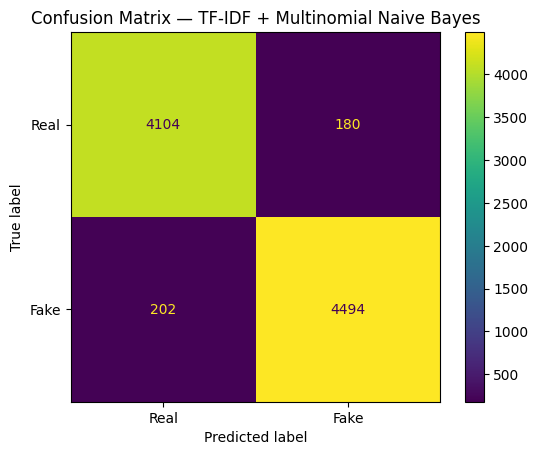

In [8]:
# Confusion Matrix (Naive Bayes)
cm_nb = confusion_matrix(y_test, y_pred_nb, labels=[0, 1])
disp_nb = ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=["Real", "Fake"])
disp_nb.plot(values_format="d")
plt.title("Confusion Matrix — TF-IDF + Multinomial Naive Bayes")
plt.show()


# 6) Embedding-based Model (LSTM)

We build a simple LSTM classifier using:
- Keras `Tokenizer` (train-only fit)
- `pad_sequences` (fixed length)
- `Embedding` → `LSTM` → `Dense(sigmoid)`

This is kept intentionally simple and reproducible.


In [9]:
# =====================
# 6) Tokenization for LSTM
# =====================
VOCAB_SIZE = 50000  # Vocabulary size: limits model complexity while covering frequent terms
MAX_LEN = 300       # Maximum sequence length: captures sufficient context while controlling computation
OOV_TOKEN = "<OOV>" # Token for out-of-vocabulary words

tokenizer = Tokenizer(num_words=VOCAB_SIZE, oov_token=OOV_TOKEN)
tokenizer.fit_on_texts(X_train)

train_seq = tokenizer.texts_to_sequences(X_train)
test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(train_seq, maxlen=MAX_LEN, padding="post", truncating="post")
X_test_pad = pad_sequences(test_seq, maxlen=MAX_LEN, padding="post", truncating="post")

print("Train padded shape:", X_train_pad.shape)
print("Test padded shape :", X_test_pad.shape)


Train padded shape: (35918, 300)
Test padded shape : (8980, 300)


In [10]:
# =====================
# 6) Build LSTM Model
# =====================
EMBED_DIM = 128 # Embedding dimension: balances semantic representation and computational cost
LSTM_UNITS = 64 # LSTM hidden units: sufficient to capture sequence patterns while avoiding overfitting
DROPOUT = 0.2   # Dropout rate: regularization to improve generalization on unseen data

model = models.Sequential([
    layers.Embedding(input_dim=VOCAB_SIZE, output_dim=EMBED_DIM, input_length=MAX_LEN),
    layers.SpatialDropout1D(DROPOUT),
    layers.LSTM(LSTM_UNITS, dropout=DROPOUT, recurrent_dropout=0.0),
    layers.Dense(1, activation="sigmoid")
])

model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name="accuracy"),
        tf.keras.metrics.Precision(name="precision"),
        tf.keras.metrics.Recall(name="recall"),
    ]
)

model.summary()


/Users/atsushihatakeyama/Desktop/CM3060-NLP/mid-term/code/.venv/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d               │ ?                      │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

## 7) Train LSTM and confirm results

We track:
- training time
- final evaluation metrics
- confusion matrix and classification report
- inference latency (per sample)


In [11]:
# =====================
# 7) Train LSTM
# =====================
BATCH_SIZE = 128 # Batch size: balances training speed and memory usage
EPOCHS = 3       # Number of training epochs: sufficient for convergence while avoiding overfitting

t0 = time.perf_counter()
history = model.fit(
    X_train_pad, y_train,
    validation_split=0.1,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1
)
t_train_lstm = time.perf_counter() - t0

print("LSTM training time (s):", round(t_train_lstm, 4))


Epoch 1/3
253/253 ━━━━━━━━━━━━━━━━━━━━ 87s 339ms/step - accuracy: 0.7915 - loss: 0.4720 - precision: 0.7555 - recall: 0.8882 - val_accuracy: 0.8355 - val_loss: 0.4425 - val_precision: 0.7729 - val_recall: 0.9764
Epoch 2/3
253/253 ━━━━━━━━━━━━━━━━━━━━ 77s 304ms/step - accuracy: 0.8609 - loss: 0.3492 - precision: 0.8021 - recall: 0.9740 - val_accuracy: 0.8998 - val_loss: 0.2927 - val_precision: 0.8512 - val_recall: 0.9827
Epoch 3/3
253/253 ━━━━━━━━━━━━━━━━━━━━ 75s 297ms/step - accuracy: 0.9176 - loss: 0.2499 - precision: 0.8841 - recall: 0.9693 - val_accuracy: 0.9410 - val_loss: 0.2028 - val_precision: 0.9159 - val_recall: 0.9785
LSTM training time (s): 239.3685


In [12]:
# =====================
# 7) Evaluate LSTM
# =====================
t1 = time.perf_counter()
y_prob_lstm = model.predict(X_test_pad, batch_size=BATCH_SIZE, verbose=0).reshape(-1)
t_infer_lstm = time.perf_counter() - t1

y_pred_lstm = (y_prob_lstm >= 0.5).astype(int)
latency_per_sample_lstm = t_infer_lstm / len(X_test_pad)

print("LSTM inference time  (s):", round(t_infer_lstm, 4))
print("LSTM latency/sample  (ms):", round(latency_per_sample_lstm * 1000, 6))

print("\nClassification report (LSTM):")
print(classification_report(y_test, y_pred_lstm, target_names=["Real", "Fake"]))


LSTM inference time  (s): 5.7627
LSTM latency/sample  (ms): 0.641728

Classification report (LSTM):
              precision    recall  f1-score   support

        Real       0.97      0.90      0.93      4284
        Fake       0.91      0.98      0.94      4696

    accuracy                           0.94      8980
   macro avg       0.94      0.94      0.94      8980
weighted avg       0.94      0.94      0.94      8980



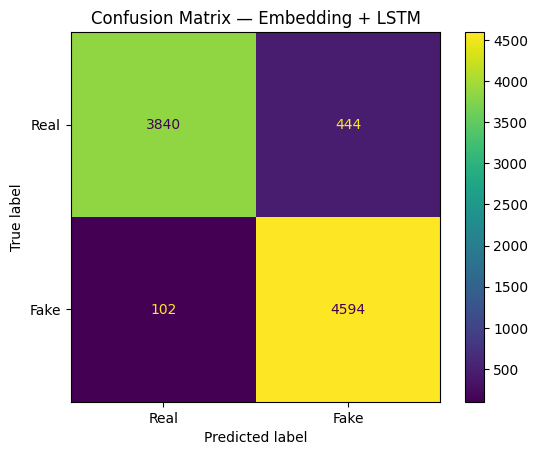

In [13]:
# Confusion Matrix (LSTM)
cm_lstm = confusion_matrix(y_test, y_pred_lstm, labels=[0, 1])
disp_lstm = ConfusionMatrixDisplay(confusion_matrix=cm_lstm, display_labels=["Real", "Fake"])
disp_lstm.plot(values_format="d")
plt.title("Confusion Matrix — Embedding + LSTM")
plt.show()


# 8) Comparison summary (Effectiveness vs Efficiency)

We summarize:
- F1-score (primary)
- Training time
- Inference latency


In [14]:
# =====================
# 8) Comparison Summary Table
# =====================
def f1_for_positive_class(y_true, y_pred, positive_label=1):
    p, r, f1, _ = precision_recall_fscore_support(
        y_true, y_pred, labels=[positive_label], average=None, zero_division=0
    )
    return float(p[0]), float(r[0]), float(f1[0])

p_nb, r_nb, f1_nb = f1_for_positive_class(y_test, y_pred_nb, positive_label=1)
p_lstm, r_lstm, f1_lstm = f1_for_positive_class(y_test, y_pred_lstm, positive_label=1)

summary = pd.DataFrame([
    {
        "Model": "TF-IDF + MultinomialNB (Baseline)",
        "Precision(Fake)": p_nb,
        "Recall(Fake)": r_nb,
        "F1(Fake)": f1_nb,
        "TrainingTime(s)": t_train_baseline,
        "InferenceLatency(ms/sample)": latency_per_sample_nb * 1000,
    },
    {
        "Model": "Embedding + LSTM",
        "Precision(Fake)": p_lstm,
        "Recall(Fake)": r_lstm,
        "F1(Fake)": f1_lstm,
        "TrainingTime(s)": t_train_lstm,
        "InferenceLatency(ms/sample)": latency_per_sample_lstm * 1000,
    },
])

# Display
pd.set_option("display.max_colwidth", 80)
display(summary)


,Model,Precision(Fake),Recall(Fake),F1(Fake),TrainingTime(s),InferenceLatency(ms/sample)
0,TF-IDF + MultinomialNB (Baseline),0.961489,0.956985,0.959232,14.253095,0.323372
1,Embedding + LSTM,0.911870,0.978279,0.943908,239.368482,0.641728


## Save artifacts

Save the trained models and tokenizer for reproducibility.


In [15]:
# =====================
# Optional: Save Artifacts
# =====================
ARTIFACT_DIR = Path("./artifacts")
ARTIFACT_DIR.mkdir(exist_ok=True)

# Save baseline pipeline
import joblib
joblib.dump(baseline_clf, ARTIFACT_DIR / "baseline_tfidf_nb.joblib")

# Save LSTM model
model.save(ARTIFACT_DIR / "lstm_model.keras")

# Save tokenizer
tokenizer_json = tokenizer.to_json()
(ARTIFACT_DIR / "tokenizer.json").write_text(tokenizer_json, encoding="utf-8")

print("Saved artifacts to:", ARTIFACT_DIR.resolve())


Saved artifacts to: /Users/atsushihatakeyama/Desktop/CM3060-NLP/mid-term/code/artifacts


## Performance comparison
Figure 1: Trade-off between Accuracy and Computational Cost. The blue bars represent the F1-Score, and the red line indicates the training time in seconds. The statistical baseline (Naive Bayes) achieves a superior F1-Score (0.959) compared to the LSTM (0.944) while requiring significantly less training time (14.25s vs. 239.37s), demonstrating a substantial advantage in computational efficiency.

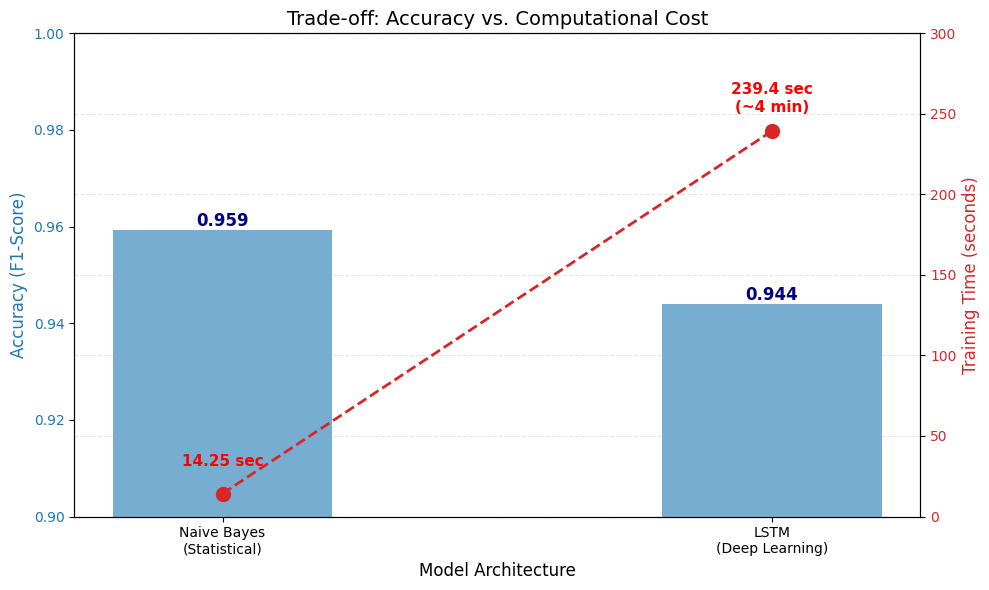

In [3]:
import matplotlib.pyplot as plt

# ==========================================
# 2. Performance vs. Efficiency Graph
# ==========================================
# Using measured values from CM3060_Implementation_EndToEnd.pdf (Source: 1350)
# NB: F1=0.959, Time=14.25s
# LSTM: F1=0.944, Time=239.37s

# Measured Values
accuracy_nb = 0.9592
accuracy_lstm = 0.9439
time_nb = 14.2531
time_lstm = 239.3685

# Prepare the plot
fig, ax1 = plt.subplots(figsize=(10, 6))
models = ['Naive Bayes\n(Statistical)', 'LSTM\n(Deep Learning)']
acc_scores = [accuracy_nb, accuracy_lstm]
times = [time_nb, time_lstm]

# --- Left Axis: Accuracy (Bar Chart) ---
color = 'tab:blue'
ax1.set_xlabel('Model Architecture', fontsize=12)
ax1.set_ylabel('Accuracy (F1-Score)', color=color, fontsize=12)
bars = ax1.bar(models, acc_scores, color=color, alpha=0.6, width=0.4, label='Accuracy')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(0.90, 1.0) 

# Display values on top of bars
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.3f}',
             ha='center', va='bottom', fontsize=12, fontweight='bold', color='navy')

# --- Right Axis: Training Time (Line Plot) ---
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Training Time (seconds)', color=color, fontsize=12)
ax2.plot(models, times, color=color, marker='o', linewidth=2, markersize=10, linestyle='--', label='Training Time')
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(0, 300)

# Display time values as text (adjusted positions for readability)
ax2.text(0, time_nb + 15, f'{time_nb:.2f} sec', color='red', ha='center', va='bottom', fontsize=11, fontweight='bold')
ax2.text(1, time_lstm + 10, f'{time_lstm:.1f} sec\n(~4 min)', color='red', ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.title('Trade-off: Accuracy vs. Computational Cost', fontsize=14)
plt.grid(True, axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.savefig('performance_tradeoff_graph.png') # Save as image
plt.show()